In [27]:
# data source: https://github.com/selva86/datasets/blob/master/midwest_filter.csv
# author: Sun Yingfei

In [28]:
import numpy as np
import pandas as pd

# 导入数据
midwest = pd.read_csv('midwest_filter.csv')

# 提取标签中不重复类别
categories = np.unique(midwest['category'])  # 使用unique去除重复项
print(categories)


['AAR' 'AAU' 'AHR' 'ALR' 'ALU' 'HAR' 'HAU' 'HHR' 'HLR' 'HLU' 'LAR' 'LAU'
 'LHR' 'LHU']


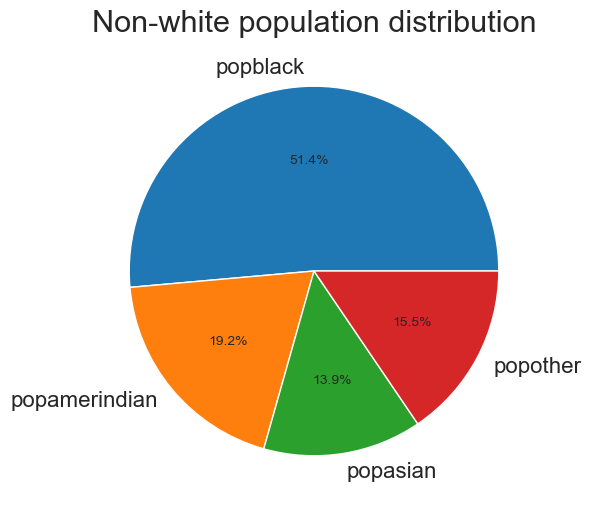

In [34]:
# 计算A，B，C列的总和
total_sum = midwest[['popblack', 'popamerindian','popasian','popother']].sum()

# 绘制饼图
plt.figure(figsize=(6, 6))
plt.pie(total_sum, labels=total_sum.index, autopct='%1.1f%%')
plt.title('Non-white population distribution')
plt.show()

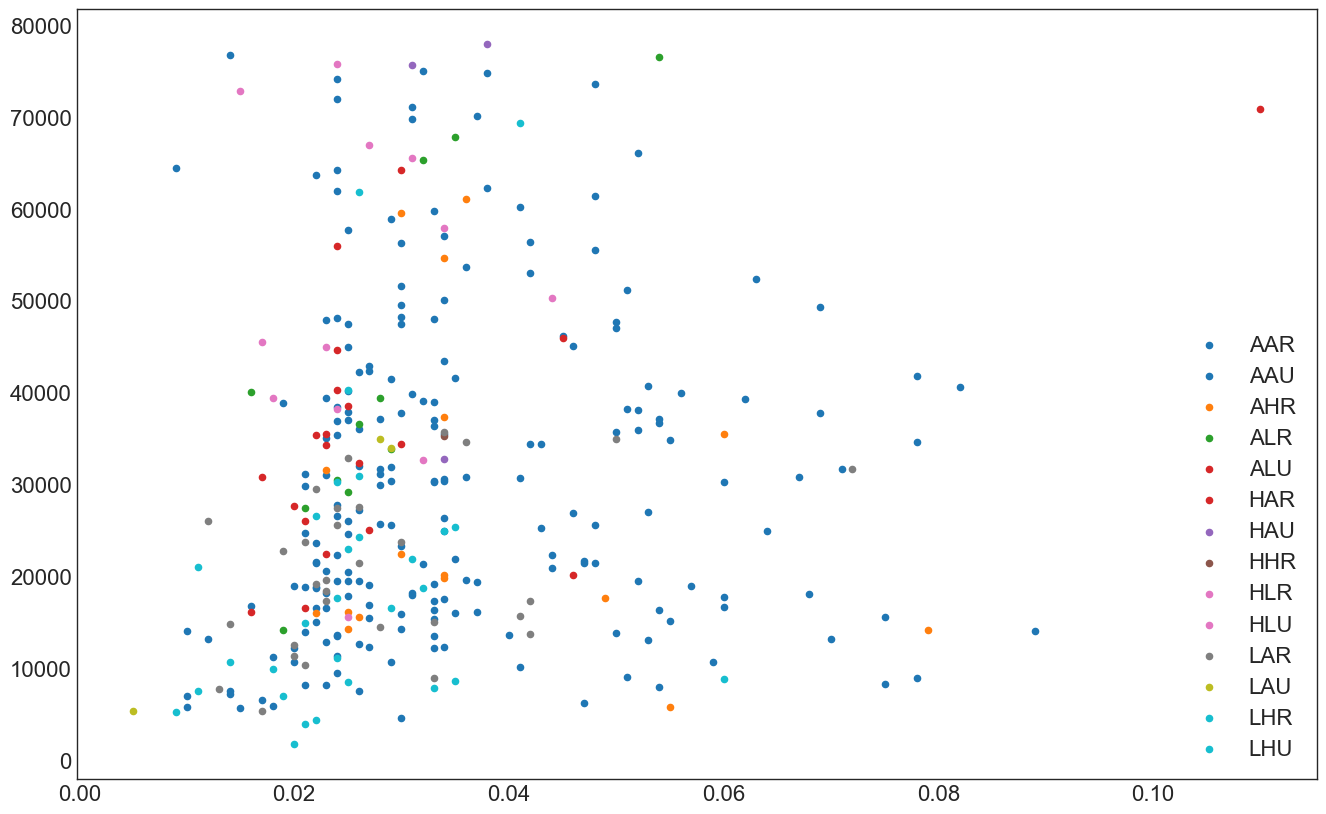

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 导入数据
midwest = pd.read_csv('midwest_filter.csv')

# 准备标签列表与颜色列表
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i / float(len(categories) - 1)) for i in range(len(categories))]

plt.figure(figsize=(16, 10))

for i, category in enumerate(categories):  # i 为索引 category为特征
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category == category, :]
                , s=20  # 点的大小
                , c=np.array(colors[i]).reshape(1, -1)  # 点的颜色
                , label=str(category))  # 标签

plt.legend()  # 显示图例（标签）
plt.show()  # 显示图像


/var/folders/89/ky6nw_6n6cd2jjqcy81gwhkc0000gn/T/ipykernel_3460/3224106050.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')  # 设置整体风格


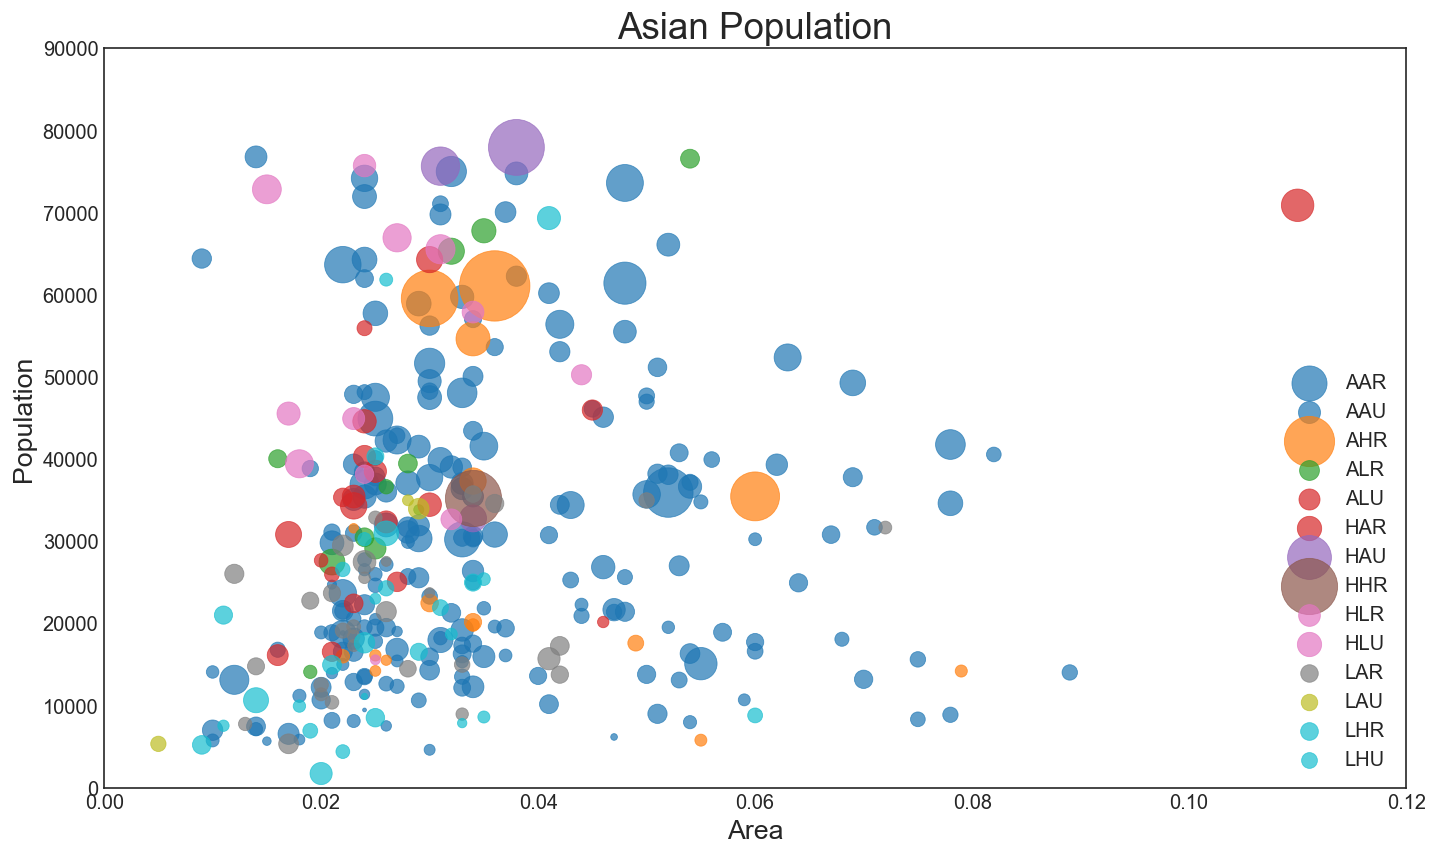

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 导入数据
midwest = pd.read_csv('midwest_filter.csv')

# 预设图像各种信息
large = 22
med = 16
small = 12
params = {'axes.titlesize': large,  # 子图上的标题字体大小
          'legend.fontsize': med,  # 图例的字体大小
          'figure.figsize': (med, small),  # 画布大小
          'axes.labelsize': med,  # 标签的字体大小
          'xtick.labelsize': med,  # x轴标尺的字体大小
          'ytick.labelsize': med,  # y轴标尺的字体大小
          'figure.titlesize': large}  # 整个画布的标题字体大小
plt.rcParams.update(params)  # 设定各种默认属性
plt.style.use('seaborn-whitegrid')  # 设置整体风格
sns.set_style('white')  # 设置整体背景风格

# 准备标签列表与颜色列表
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i / float(len(categories) - 1)) for i in range(len(categories))]

# 布置画布
fig = plt.figure(figsize=(14, 8), dpi=120, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category == category, :]
                , s=midwest.loc[midwest.category == category, 'percasian'] * 500  # 需要对比的属性
                , c=np.array(colors[i]).reshape(1, -1)  # 点的颜色
                , edgecolors=np.array(colors[i]).reshape(1, -1)  # 点的边缘颜色
                , label=str(category)  # 标签
                , alpha=0.7  # 透明度
                , linewidths=.5)  # 点的边缘线的宽度

# 装饰图像
plt.gca().set(xlim=(0.0, 0.12), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Asian Population', fontsize=22)

lgnd = plt.legend(fontsize=12)
plt.show() # 显示图像


/var/folders/89/ky6nw_6n6cd2jjqcy81gwhkc0000gn/T/ipykernel_3460/3236535138.py:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')  # 设置整体风格


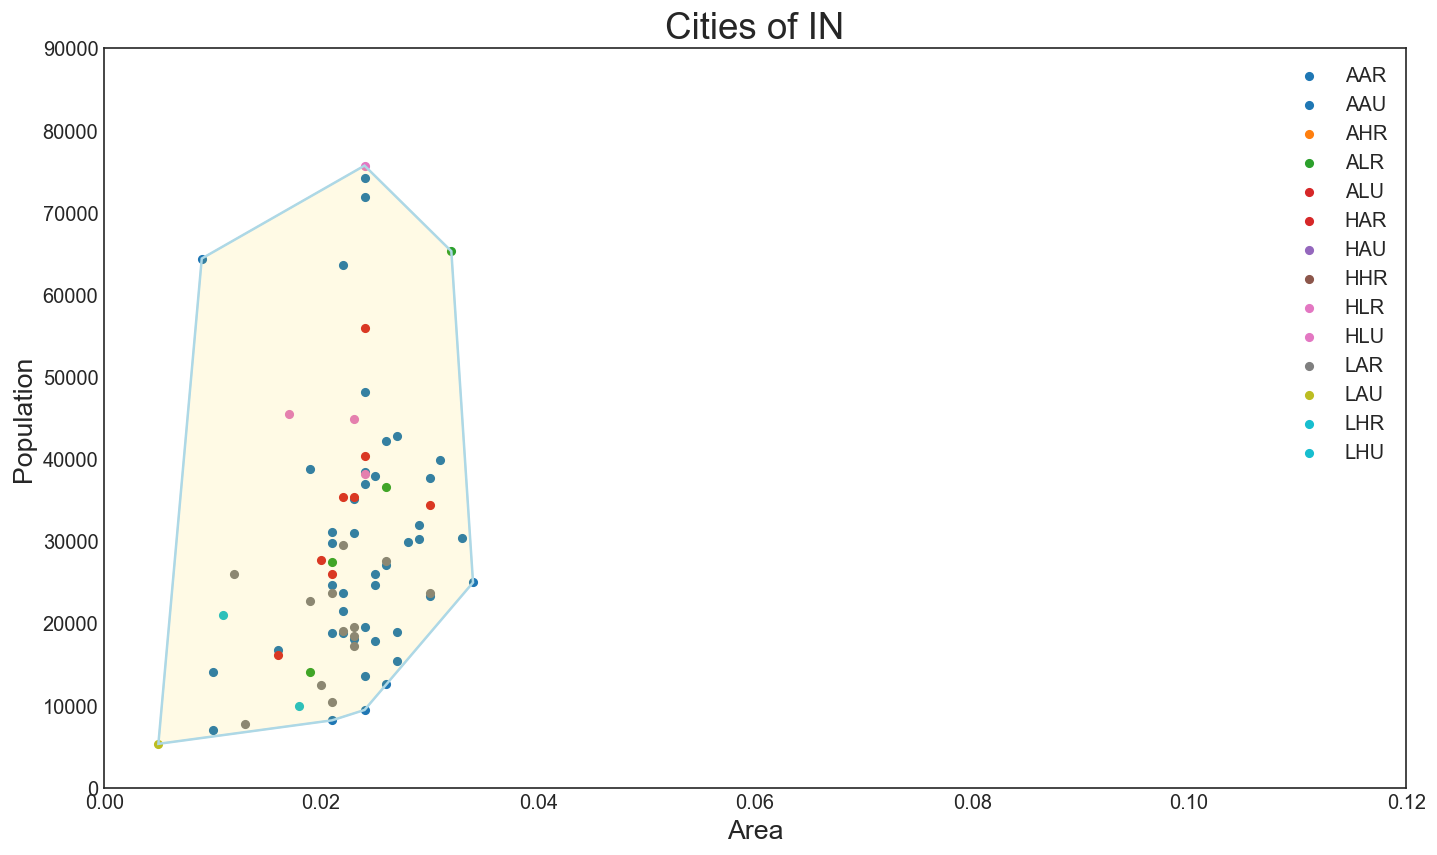

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial import ConvexHull

# 导入数据
midwest = pd.read_csv('midwest_filter.csv')

# 预设图像各种信息
large = 22
med = 16
small = 12
params = {'axes.titlesize': large,  # 子图上的标题字体大小
          'legend.fontsize': med,  # 图例的字体大小
          'figure.figsize': (med, small),  # 画布大小
          'axes.labelsize': med,  # 标签的字体大小
          'xtick.labelsize': med,  # x轴标尺的字体大小
          'ytick.labelsize': med,  # y轴标尺的字体大小
          'figure.titlesize': large}  # 整个画布的标题字体大小
plt.rcParams.update(params)  # 设定各种默认属性
plt.style.use('seaborn-whitegrid')  # 设置整体风格
sns.set_style('white')  # 设置整体背景风格

# 准备标签列表与颜色列表
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i / float(len(categories) - 1)) for i in range(len(categories))]

# 布置画布
fig = plt.figure(figsize=(14, 8), dpi=120, facecolor='w', edgecolor='k')


for i, category in enumerate(categories):  # i 为索引 category为特征
    plt.scatter('area', 'poptotal', data=midwest.loc[(midwest.category == category) &(midwest.state == 'IN'), :]
                , s=20  # 点的大小
                , c=np.array(colors[i]).reshape(1, -1)  # 点的颜色
                , label=str(category))  # 标签


# 绘制凸包
# 定义函数
def encircle(x, y, ax=None, **kw):
    if not ax: ax = plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)


# 定义需要被框起来的数据：所有在in州中的城市
midwest_encircle_data = midwest.loc[midwest.state == ''
, :]

# 使用函数绘制
encircle(midwest_encircle_data.area,
         midwest_encircle_data.poptotal,
         ec='k',
         fc='gold',
         alpha=0.1)

# 绘制包围的淡蓝色的线
encircle(midwest_encircle_data.area,
         midwest_encircle_data.poptotal,
         ec='lightblue',
         fc='none',
         linewidth=1.5)

# 装饰图像
plt.gca().set(xlim=(0.0, 0.12), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Cities of IN', fontsize=22)
lgnd = plt.legend(fontsize=12)
plt.show()


/var/folders/89/ky6nw_6n6cd2jjqcy81gwhkc0000gn/T/ipykernel_3460/369642747.py:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')  # 设置整体风格


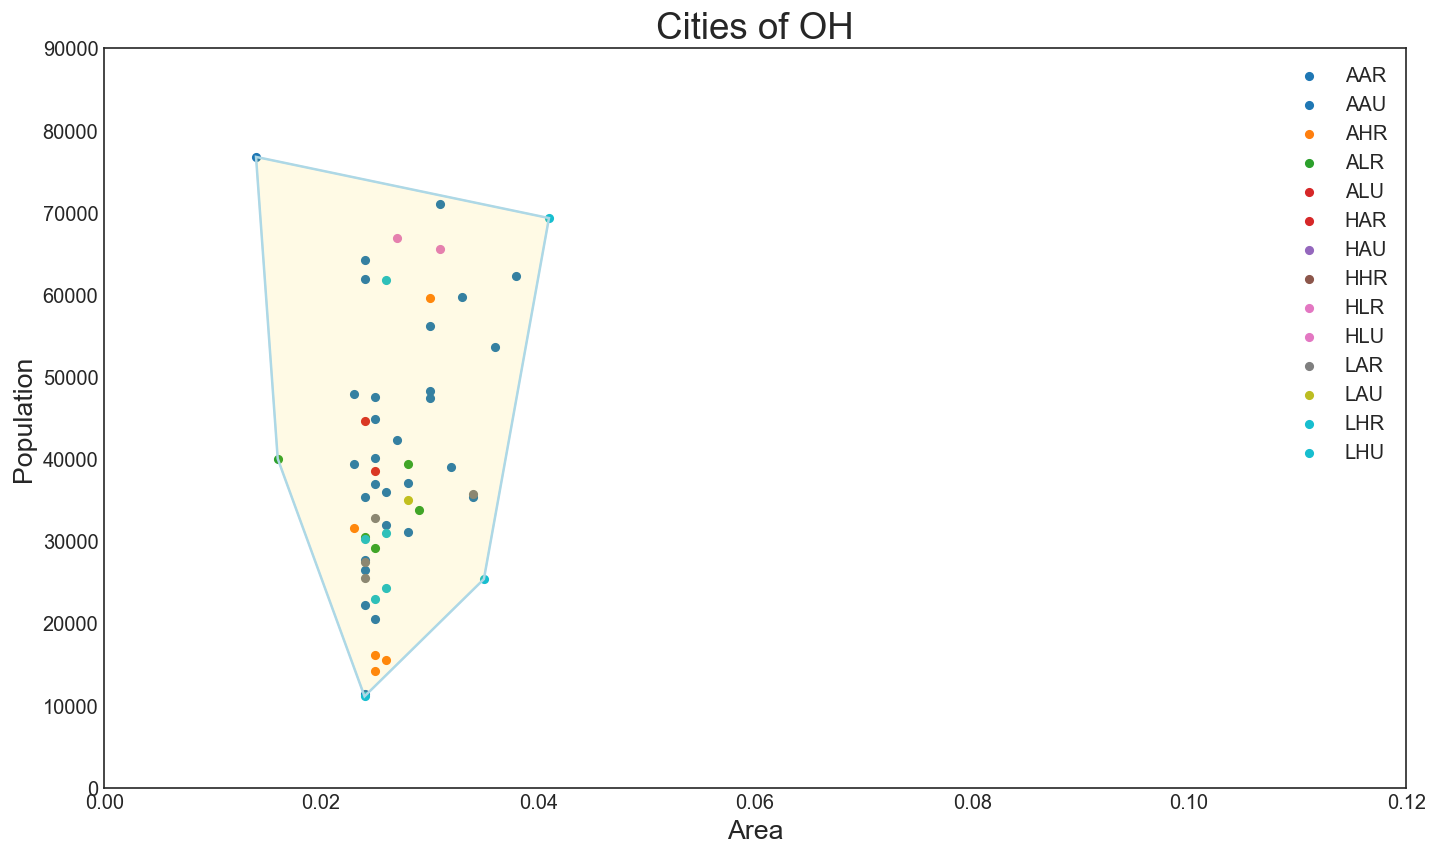

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial import ConvexHull

# 导入数据
midwest = pd.read_csv('midwest_filter.csv')

# 预设图像各种信息
large = 22
med = 16
small = 12
params = {'axes.titlesize': large,  # 子图上的标题字体大小
          'legend.fontsize': med,  # 图例的字体大小
          'figure.figsize': (med, small),  # 画布大小
          'axes.labelsize': med,  # 标签的字体大小
          'xtick.labelsize': med,  # x轴标尺的字体大小
          'ytick.labelsize': med,  # y轴标尺的字体大小
          'figure.titlesize': large}  # 整个画布的标题字体大小
plt.rcParams.update(params)  # 设定各种默认属性
plt.style.use('seaborn-whitegrid')  # 设置整体风格
sns.set_style('white')  # 设置整体背景风格

# 准备标签列表与颜色列表
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i / float(len(categories) - 1)) for i in range(len(categories))]

# 布置画布
fig = plt.figure(figsize=(14, 8), dpi=120, facecolor='w', edgecolor='k')


for i, category in enumerate(categories):  # i 为索引 category为特征
    plt.scatter('area', 'poptotal', data=midwest.loc[(midwest.category == category) &(midwest.state == 'OH'), :]
                , s=20  # 点的大小
                , c=np.array(colors[i]).reshape(1, -1)  # 点的颜色
                , label=str(category))  # 标签


# 绘制凸包
# 定义函数
def encircle(x, y, ax=None, **kw):
    if not ax: ax = plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)


# 定义需要被框起来的数据：所有在in州中的城市
midwest_encircle_data = midwest.loc[midwest.state == 'OH'
, :]

# 使用函数绘制
encircle(midwest_encircle_data.area,
         midwest_encircle_data.poptotal,
         ec='k',
         fc='gold',
         alpha=0.1)

# 绘制包围的淡蓝色的线
encircle(midwest_encircle_data.area,
         midwest_encircle_data.poptotal,
         ec='lightblue',
         fc='none',
         linewidth=1.5)

# 装饰图像
plt.gca().set(xlim=(0.0, 0.12), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Cities of OH', fontsize=22)
lgnd = plt.legend(fontsize=12)
plt.show()


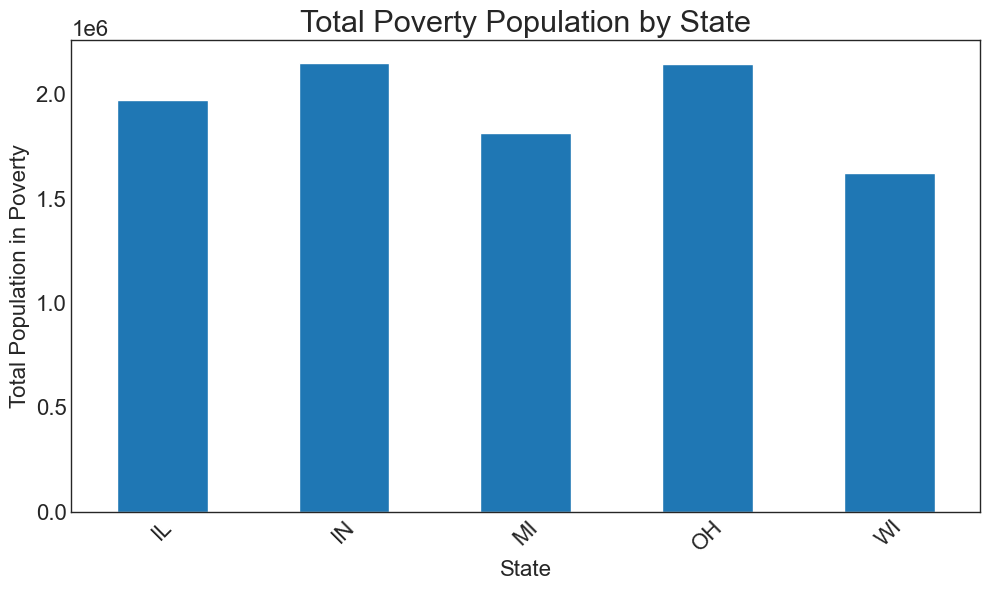

In [17]:
poverty_by_state = midwest.groupby('state')['poppovertyknown'].sum()

# 绘制柱状图
plt.figure(figsize=(10, 6))
poverty_by_state.plot(kind='bar')
plt.title('Total Poverty Population by State')
plt.xlabel('State')
plt.ylabel('Total Population in Poverty')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()